In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import DiadFit as pf
import os

In [6]:
Data=pd.read_excel(r"C:\Users\charl\Documents\Kil_SWRZ\Results.xlsx", sheet_name='Sheet1')
Data

,Unnamed: 0,Sample Name,Total_wt%,Total_Oxide%,Al2O3,CaO,Cr2O3,Cu,FeOt,MgO,...,Line_Ca,Line_Mn,Line_Fe,Line_Ni,Line_Al,Line_Ti,Line_Cr,Line_Cu,SampleID,Fo
0,0,SanCarlos1_1,99.0946,99.0946,NaN,0.1485,NaN,NaN,9.5936,48.5079,...,K series,K series,K series,Kα,NaN,NaN,NaN,NaN,SanCarlos1_1,0.900130
1,1,SanCarlos1_2,99.5029,99.5029,NaN,0.0363,NaN,NaN,9.8525,48.5695,...,K series,K series,K series,Kα,NaN,NaN,NaN,NaN,SanCarlos1_2,0.897827
2,2,SanCarlos1_3,99.8710,99.8710,NaN,0.1326,NaN,NaN,9.6518,48.5980,...,K series,K series,K series,Kα,NaN,NaN,NaN,NaN,SanCarlos1_3,0.899752
3,3,SanCarlos1_4,99.0721,99.0721,NaN,-0.0207,NaN,NaN,9.5304,48.3042,...,K series,K series,K series,Kα,NaN,NaN,NaN,NaN,SanCarlos1_4,0.900345
4,4,Springwater1_1,100.5117,100.5117,NaN,0.0380,NaN,NaN,16.5200,43.7118,...,K series,K series,K series,Kα,NaN,NaN,NaN,NaN,Springwater1_1,0.825070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,70,KL0919_005_FIA,98.5358,98.5358,NaN,0.2251,NaN,NaN,11.3319,46.5307,...,K series,K series,K series,Kα,NaN,NaN,NaN,NaN,KL0919_005_FIA,0.879799
71,71,"KL0919_006_FIA,B",99.7526,99.7526,NaN,0.2500,NaN,NaN,10.9893,47.4769,...,K series,K series,K series,Kα,NaN,NaN,NaN,NaN,"KL0919_006_FIA,B",0.885071
72,72,KL0919_008_FIA,99.0047,99.0047,NaN,0.2556,NaN,NaN,10.9076,47.2699,...,K series,K series,K series,Kα,NaN,NaN,NaN,NaN,KL0919_008_FIA,0.885386
73,73,KL0919_010_FIA,99.8430,99.8430,NaN,0.2451,NaN,NaN,10.8223,47.6925,...,K series,K series,K series,Kα,NaN,NaN,NaN,NaN,KL0919_010_FIA,0.887075


In [9]:
import pandas as pd

# Assuming you have two DataFrames SEM_data and Raman_data
# Merge SEM_data into Raman_data based on the specified columns
merged_df = Raman_data.merge(SEM_data, left_on='FI Name', right_on='EDS_Name', how='left')
merged_df.tail()

,Unnamed: 0,Crystal Name,FI Name,Mean of reps?,Density g/cm3,"σ Density g/cm3 (from DiadFit, STD for averaged FI)",STDofreps_Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),...,Time,Spot,O,Si,Fe,Mg,Fo,Total,(Mg+Fe)/Si,WD
57,58,KS23_316,K23_316_FIA,Yes,0.101449,0.015256,0.015256,0.005407,0.003766,0.003809,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,59,KS23_316,K23_316_FIB,NaN,0.111436,0.006603,NaN,0.006603,0.005390,0.003816,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,60,KS23_316,K23_316_FIC,NaN,0.112573,0.006891,NaN,0.006891,0.005737,0.003817,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,61,KS23_318,K23_318_FIA,NaN,0.091195,0.007105,NaN,0.007105,0.006002,0.003801,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,62,KS23_9,K23_9_FIA,NaN,0.114913,0.023538,NaN,0.023538,0.023226,0.003820,...,0.445833,9_FIA,57.12,14.38,4.28,24.22,0.849825,100.0,0.49895,NaN


## Calculate SO2 mol %

In [10]:
SO2_molp=pf.calculate_CO2_SO2_ratio(peak_area_SO2=merged_df['Peak_Area_SO2'],
peak_area_diad1=merged_df['Diad1_Voigt_Area'], peak_area_diad2=merged_df['Diad2_Voigt_Area'],
wavelength=532.067, T_K=37+273.15,efficiency_SO2=1, efficiency_CO2=1,
sigma_SO2=4.03, sigma_CO2_v1=0.8, sigma_CO2_v2=1.23).SO2

merged_df['SO2_mol%']=SO2_molp.fillna(0)

merged_df['SO2_mol%'].to_clipboard(excel=True)

In [11]:
import pickle
with open('model.pkl', 'rb') as f:
    poly_pf = pickle.load(f)
merged_df['Temp_from_Fo']=poly_pf(merged_df['Fo'])
# Ones without Fo, fill with Nan
merged_df['Temp_from_Fo']=merged_df['Temp_from_Fo'].fillna(np.nanmean(merged_df['Temp_from_Fo']))

merged_df['P_wFoTemp']=pf.calculate_P_for_rho_T(T_K=merged_df['Temp_from_Fo']+273.15,
                CO2_dens_gcm3=merged_df['Density g/cm3'],
                 EOS='SW96').P_kbar

In [12]:
merged_df['Depth_km_ryanlerner']=pf.convert_pressure_to_depth(P_kbar=merged_df['P_wFoTemp'], model='ryan_lerner')

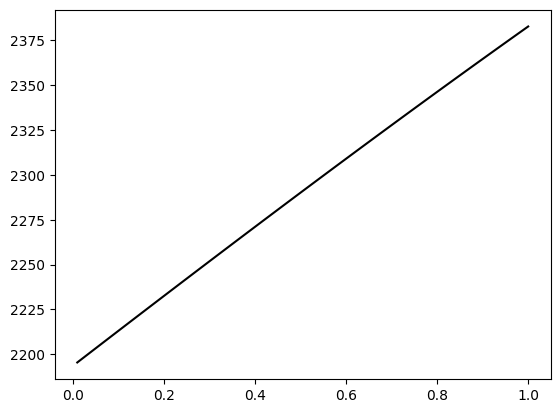

In [13]:
P=np.linspace(0, 1, 100)
D_lerner=pf.convert_pressure_to_depth(P_kbar=P, model='ryan_lerner')
rho_lerner=P/(9.8*D_lerner)
plt.plot(P, rho_lerner*100000, '-k')

working on sample number 0
working on sample number 20
working on sample number 40
working on sample number 60


,Filename,CO2_dens_gcm3,SingleFI_D_km,SingleFI_P_kbar,Mean_MC_P_kbar,Med_MC_P_kbar,std_dev_MC_P_kbar,std_dev_MC_P_kbar_from_percentile,Mean_MC_D_km,Med_MC_D_km,std_dev_MC_D_km,std_dev_MC_D_km_from_percentile,error_T_K,error_CO2_dens_gcm3,error_crust_dens_kgm3,T_K,CO2_dens_gcm3_input,model,crust_dens_kgm3,EOS
0,K23_101_FIC,0.085665,1.193235,0.269230,0.268564,0.268291,0.026365,0.026510,1.189702,1.182519,0.125655,0.124388,40.259896,0.007736,100.0,1565.805593,0.085665,None,2300,SW96
1,K23_101_FID,0.100137,1.409866,0.318108,0.317453,0.316558,0.027090,0.027499,1.409199,1.405319,0.134092,0.134296,40.259896,0.007736,100.0,1565.805593,0.100137,None,2300,SW96
2,K23_102_FIA,0.112454,1.596183,0.360147,0.358903,0.358518,0.029059,0.028468,1.594048,1.589481,0.148504,0.143823,40.259896,0.007736,100.0,1564.096549,0.112454,None,2300,SW96
3,K23_10_FIA,0.131039,1.819663,0.410571,0.410555,0.410026,0.029390,0.029338,1.824839,1.818504,0.152003,0.149660,40.259896,0.007736,100.0,1511.482018,0.131039,None,2300,SW96
4,K23_1_FIA,0.142919,2.041608,0.460648,0.459546,0.457489,0.031053,0.030160,2.041432,2.035298,0.161055,0.160094,40.259896,0.007736,100.0,1539.103462,0.142919,None,2300,SW96


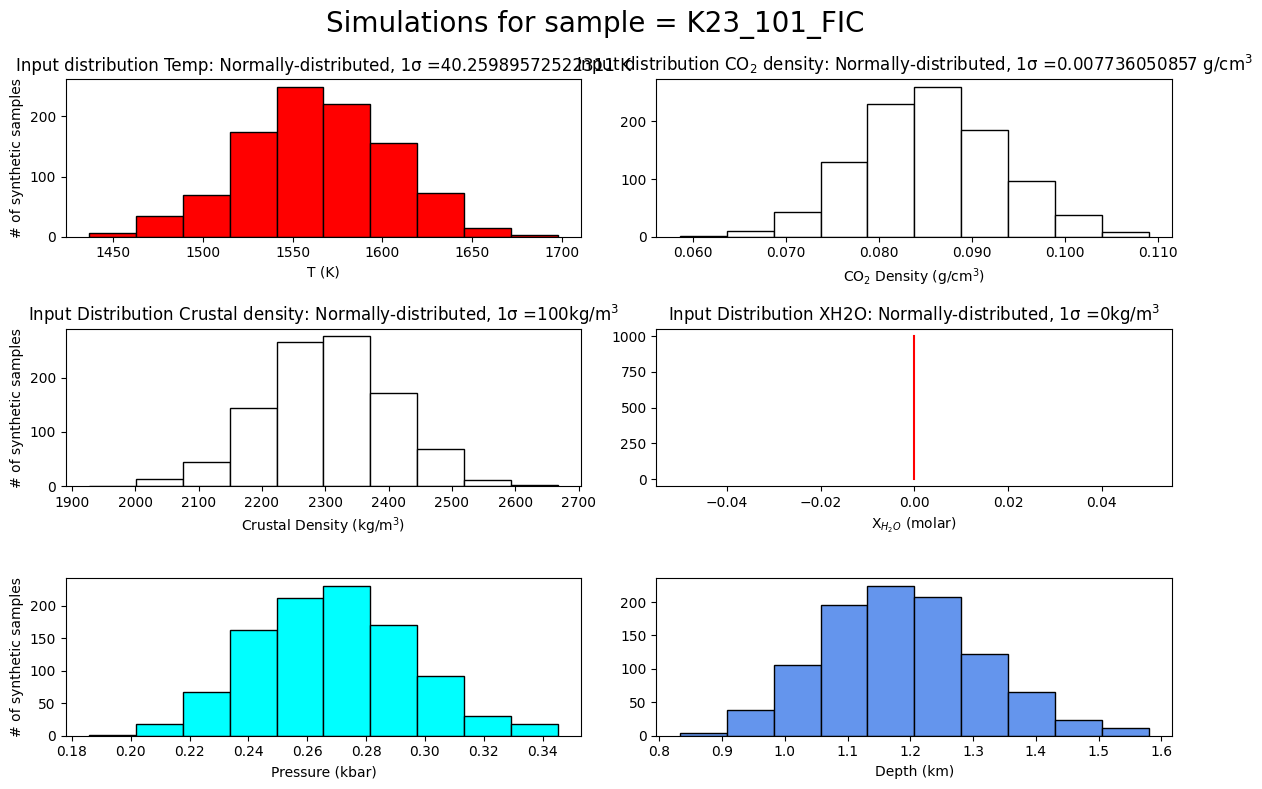

In [15]:
## Lets run a Monte-Carlo simulation to get error on each FI - This uses the Fo content for temperature

MC_Av_rho_T, MC_All_rho_T, fig=pf.propagate_FI_uncertainty(
T_K=merged_df['Temp_from_Fo']+273.15,
error_T_K=np.std(merged_df['Temp_from_Fo']), error_type_T_K='Abs', error_dist_T_K='normal',
CO2_dens_gcm3=merged_df['Density g/cm3'],error_CO2_dens=merged_df['σ Density g/cm3'], error_type_CO2_dens='Abs', error_dist_CO2_dens='normal',
sample_ID=merged_df['FI Name'],

crust_dens_kgm3=2300,
error_crust_dens=100, error_type_crust_dens='Abs', error_dist_crust_dens='normal',
N_dup=1000, fig_i=0, plot_figure=True)
MC_Av_rho_T.head()




In [16]:
# Now merge results into dataframe
full_df=pd.concat([merged_df,MC_Av_rho_T],axis=1)
full_df = full_df.drop(columns=full_df.filter(like='Unnamed'))
display(full_df)
full_df.to_excel(r"final_dataset.xlsx")

,Crystal Name,FI Name,Mean of reps?,Density g/cm3,"σ Density g/cm3 (from DiadFit, STD for averaged FI)",STDofreps_Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,...,std_dev_MC_D_km,std_dev_MC_D_km_from_percentile,error_T_K,error_CO2_dens_gcm3,error_crust_dens_kgm3,T_K,CO2_dens_gcm3_input,model,crust_dens_kgm3,EOS
0,K23_101,K23_101_FIC,NaN,0.085665,0.007736,NaN,0.007736,0.006738,0.003801,102.966450,...,0.125655,0.124388,40.259896,0.007736,100.0,1565.805593,0.085665,None,2300,SW96
1,K23_101,K23_101_FID,NaN,0.100137,0.005037,NaN,0.005037,0.003301,0.003805,103.002974,...,0.134092,0.134296,40.259896,0.007736,100.0,1565.805593,0.100137,None,2300,SW96
2,K23_102,K23_102_FIA,NaN,0.112454,0.004482,NaN,0.004482,0.002350,0.003817,103.034058,...,0.148504,0.143823,40.259896,0.007736,100.0,1564.096549,0.112454,None,2300,SW96
3,K23_10,K23_10_FIA,NaN,0.131039,0.004066,NaN,0.004066,0.001310,0.003849,103.080962,...,0.152003,0.149660,40.259896,0.007736,100.0,1511.482018,0.131039,None,2300,SW96
4,K23_1,K23_1_FIA,Yes,0.142919,0.002579,0.002579,0.003950,0.000744,0.003879,103.110944,...,0.161055,0.160094,40.259896,0.007736,100.0,1539.103462,0.142919,None,2300,SW96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,KS23_316,K23_316_FIA,Yes,0.101449,0.015256,0.015256,0.005407,0.003766,0.003809,103.006284,...,0.132897,0.131721,40.259896,0.007736,100.0,1511.482018,0.101449,None,2300,SW96
58,KS23_316,K23_316_FIB,NaN,0.111436,0.006603,NaN,0.006603,0.005390,0.003816,103.031490,...,0.143273,0.140834,40.259896,0.007736,100.0,1511.482018,0.111436,None,2300,SW96
59,KS23_316,K23_316_FIC,NaN,0.112573,0.006891,NaN,0.006891,0.005737,0.003817,103.034359,...,0.134715,0.138083,40.259896,0.007736,100.0,1511.482018,0.112573,None,2300,SW96
60,KS23_318,K23_318_FIA,NaN,0.091195,0.007105,NaN,0.007105,0.006002,0.003801,102.980407,...,0.123049,0.119426,40.259896,0.007736,100.0,1511.482018,0.091195,None,2300,SW96
